# UMAP

[Beautiful UMAP - Tutorial on 100-Dimensional Data](https://www.kaggle.com/code/bextuychiev/beautiful-umap-tutorial-on-100-dimensional-data)

[umap.umap_.UMAP](https://umap-learn.readthedocs.io/en/latest/api.html#umap.umap_.UMAP)

In [2]:
#!pip install umap-learn

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
plt.style.use('seaborn-v0_8')

## Datos

In [7]:
num_puntos = (8, 8)
l_puntos = []
for i in range(num_puntos[0]):
    for j in range(num_puntos[1]):
        l_puntos.append([i, j])
X = np.array(l_puntos)
Y = np.arange(len(l_puntos))

In [44]:
def grafica_puntos(X, título, size=(3,3)):
    plt.figure(figsize=size)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='viridis')
    plt.title(título)

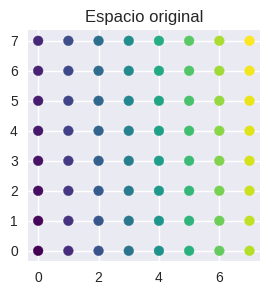

In [45]:
grafica_puntos(X, "Espacio original")

## Juego: 2D a 2D

In [17]:
%%time

import umap  # pip install umap-learn

manifold = umap.UMAP().fit(X, Y)
X_reduced = manifold.transform(X)

CPU times: user 1.64 s, sys: 54.5 ms, total: 1.7 s
Wall time: 1.49 s


In [18]:
X_reduced.shape

(64, 2)

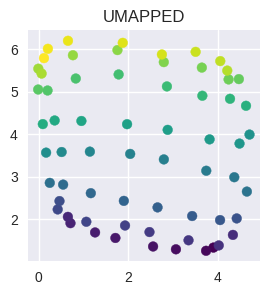

In [19]:
grafica_puntos(X_reduced, "UMAPPED")

### 2D a 1D

In [20]:
%%time

manifold_1 = umap.UMAP(n_neighbors=7, n_components=1).fit(X, Y)
X_reduced_1 = manifold_1.transform(X)

CPU times: user 1.75 s, sys: 50.5 ms, total: 1.8 s
Wall time: 1.65 s


In [21]:
X_reduced_1.shape

(64, 1)

In [26]:
X_reduced_1E = np.hstack((X_reduced_1, np.ones((len(X_reduced_1), 1))))
X_reduced_1E.shape

(64, 2)

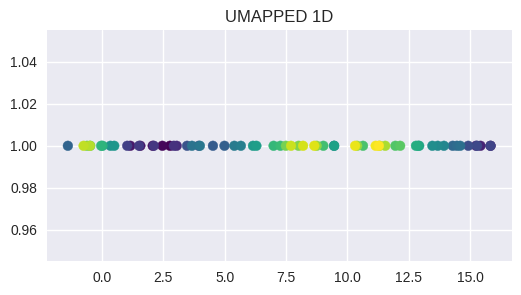

In [29]:
grafica_puntos(X_reduced_1E, "UMAPPED 1D", (6,3))

## Datos en gota

In [30]:
from matplotlib import colormaps

In [34]:
# Muestra los mapas de color disponibles
#list(colormaps)

In [36]:
cmap = colormaps.get_cmap('Spectral')
cmap([0.5, 0.1])
#dir(cmap)

array([[0.99807766, 0.99923106, 0.74602076, 1.        ],
       [0.83106498, 0.23844675, 0.30880431, 1.        ]])

In [55]:
centros = [[1, 4],
           [10, 4.2],
           [-0.5, -1],
           [8.3, 0]]
anchos = [1, 2.1, 0.5, 1.1]
muestras = [10, 8, 5, 6]
nom_map_colores = ('Purples', 'Blues', 'Reds', 'Greens')
cmap = colormaps.get_cmap('Spectral')

l2_puntos = []
ly_colores = []
for centro, ancho, mtr, mapa_c in zip(centros, anchos, muestras, nom_map_colores):
    x1 = np.random.default_rng().normal(centro[0], ancho, mtr)
    x2 = np.random.default_rng().normal(centro[1], ancho, mtr)
    ax1 = np.array(x1)[:,np.newaxis]
    ax2 = np.array(x2)[:,np.newaxis]
    l2_puntos.append(np.hstack((ax1, ax2)))
    
    y_rango = np.linspace(0, 1., mtr)
    cmap = colormaps.get_cmap(mapa_c)
    ly_colores.append(cmap(y_rango))
    

    colores = rgba = cmap(0.5)
a2_puntos = np.vstack(l2_puntos)
y2_colores = np.vstack(ly_colores)

In [56]:
def grafica_puntos_gotas(X, colores_Y, título, size=(3,3)):
    plt.figure(figsize=size)
    plt.scatter(X[:,0], X[:,1], c=colores_Y)
    plt.title(título)

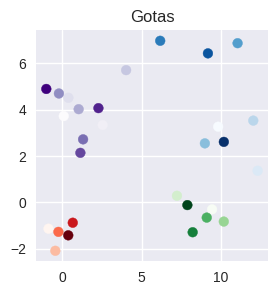

In [57]:
grafica_puntos_gotas(a2_puntos, y2_colores, "Gotas")

In [63]:
%%time

manifold_1_2 = umap.UMAP(n_neighbors=7, n_components=1).fit(a2_puntos)
a2_reduced = manifold_1_2.transform(a2_puntos)

CPU times: user 1.51 s, sys: 58.6 ms, total: 1.57 s
Wall time: 1.47 s


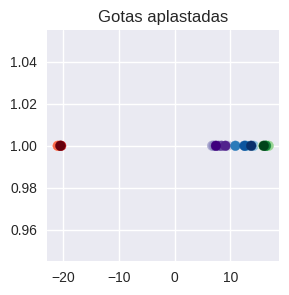

In [64]:
a2_reduced_1E = np.hstack((a2_reduced, np.ones((len(a2_reduced), 1))))
grafica_puntos_gotas(a2_reduced_1E, y2_colores, "Gotas aplastadas")